# K Means

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv("02-iris.data", names = names).sample(frac = 1).reset_index(drop = True)
X = np.array(data.iloc[:, :4])
y = data.iloc[:, 4]
m = len(X)
data.head(5)

sepal_length  sepal_width  petal_length  petal_width            class
0           6.7          3.1           5.6          2.4   Iris-virginica
1           4.4          2.9           1.4          0.2      Iris-setosa
2           5.3          3.7           1.5          0.2      Iris-setosa
3           5.6          2.7           4.2          1.3  Iris-versicolor
4           5.9          3.0           4.2          1.5  Iris-versicolor

### Randomly initialize centroids

In [3]:
def kMeansInitCentroids(X, K):
    # Randomly reorder the indices of examples
    perm = np.arange(X.shape[0])
    np.random.shuffle(perm)
    data_reorder = X[perm]
    
    # Take the first K examples as centroids
    return data_reorder[:K]


### Find closest centroid

In [4]:
def findClosestCentroids(X, centroids):
    K = X.shape[0]

    idx = np.zeros([K, 1])
    scid = 0

    # Find the new clusters
    for i in range(K):
        error_sum = np.sum((X[i] - centroids) ** 2, 1)
        scid += np.min(error_sum)
        idx[i] = np.argmin(error_sum)
    
    return [idx, scid]


### Find new centroids

In [5]:
def computeCentroids(X, idx, K):
    [m, n] = X.shape
    centroids = np.zeros([K, n])

    # Calculate new centroids
    for i in range(K):
        centroids[i] = np.array([X[(i == idx).flatten()].mean(axis = 0)])

    return centroids


## Run K-Means untill centroids are equal

In [6]:
K = 3
centroids = kMeansInitCentroids(X, K)
scid = 0
i = 0
while True:
    [idx, scidCurrent] = findClosestCentroids(X, centroids)
    scid = scidCurrent
    newCentroids = computeCentroids(X, idx, K)
    i += 1
    if (np.array_equal(newCentroids, centroids)):
        break
    centroids = newCentroids

### 1. Clustering solution

In [7]:
print("Ran %i number of times and found the centroids as: " % (i + 1))
for i in range(K):
        print("Cluster %i's centroid (%f, %f, %f, %f)" % (i+1, centroids[i, 0], centroids[i, 1], centroids[i, 2], centroids[i, 3]))

        
print("\n")
print("Clusters are as follows: ")
print(idx.T)

Ran 6 number of times and found the centroids as: 
Cluster 1's centroid (4.709091, 3.109091, 1.395455, 0.190909)
Cluster 2's centroid (5.216129, 3.538710, 1.680645, 0.358065)
Cluster 3's centroid (6.301031, 2.886598, 4.958763, 1.695876)


Clusters are as follows: 
[[2. 0. 1. 2. 2. 2. 0. 1. 2. 0. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 0. 1. 2.
  2. 0. 1. 2. 2. 0. 2. 2. 2. 0. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.
  2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 0. 2. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0.
  2. 2. 2. 1. 0. 2. 2. 2. 2. 2. 0. 2. 1. 0. 2. 1. 2. 0. 2. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 0. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 0. 1. 0. 1.
  2. 1. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 0. 2. 2. 1.
  2. 2. 1. 1. 2. 0.]]


### 2. Sum of the Intra-Cluster Distances (SICD)

In [8]:
prevScid = scid
print("Sum of squared error is %f" % scid)

Sum of squared error is 145.279322


### 3. Graphical representation of the obtained clusters.

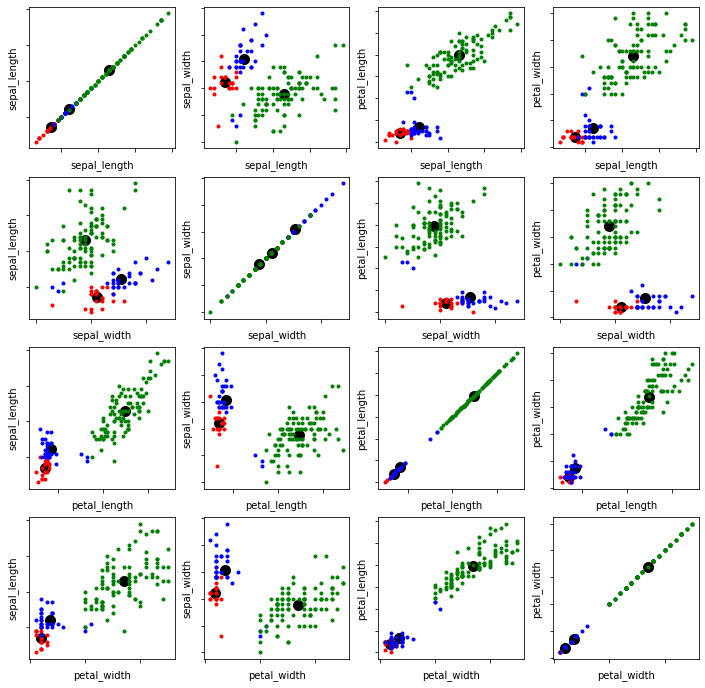

In [9]:
colors = [ "red", "blue", "green" ]
_, plots = plt.subplots(4, 4, figsize = (12, 12))
for i in range(4):
    for j in range(4):
        plots[i, j].set_xlabel(names[i])
        plots[i, j].set_ylabel(names[j])
        plots[i, j].set_xticklabels([])
        plots[i, j].set_yticklabels([])
        plots[i, j].scatter(centroids[:, i], centroids[:, j], color = "black", marker = "o", s = 100)
        for k in range(K):
            selection = X[(k == idx).flatten()]
            plots[i, j].scatter(selection[:, i], selection[:, j], color = colors[k], marker = ".")
            

## Run for 150 iterations

In [10]:
scid = []
K = 3
iterations = 150
for l in range(iterations):
    centroids = kMeansInitCentroids(X, K)
    i = 0
    while True:
        [idx, scidCurrent] = findClosestCentroids(X, centroids)
        newCentroids = computeCentroids(X, idx, K)
        i += 1
        if (np.array_equal(newCentroids, centroids)):
            break
        centroids = newCentroids
    
    if (l == 0 or scidCurrent < scid[len(scid) - 1]):
        scid.append(scidCurrent)
    else:
        scid.append(scid[len(scid) - 1])

### 4. Change in clustering solution and value

In [11]:
print("Found the centroids as: ")
for i in range(K):
        print("Cluster %i's centroid (%f, %f, %f, %f)" % (i+1, centroids[i, 0], centroids[i, 1], centroids[i, 2], centroids[i, 3]))

print("\n")
print("Sum of squared error is %f (previously %f)" % (scid[iterations - 1], prevScid))

print("\n")
print("Clusters are as follows: ")

print(idx.T)

Found the centroids as: 
Cluster 1's centroid (5.006000, 3.418000, 1.464000, 0.244000)
Cluster 2's centroid (6.853846, 3.076923, 5.715385, 2.053846)
Cluster 3's centroid (5.883607, 2.740984, 4.388525, 1.434426)


Sum of squared error is 78.940841 (previously 145.279322)


Clusters are as follows: 
[[1. 0. 0. 2. 2. 2. 0. 2. 1. 0. 0. 0. 2. 2. 1. 2. 2. 1. 1. 2. 2. 0. 0. 2.
  2. 0. 0. 2. 1. 0. 1. 2. 1. 0. 0. 2. 2. 0. 2. 1. 1. 2. 2. 0. 1. 1. 2. 2.
  1. 1. 0. 1. 2. 2. 2. 0. 1. 0. 0. 0. 1. 0. 2. 2. 0. 2. 1. 2. 1. 2. 1. 0.
  2. 2. 2. 0. 0. 2. 1. 2. 2. 1. 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 1. 2. 2. 2.
  2. 1. 1. 2. 0. 2. 2. 0. 0. 2. 1. 0. 2. 0. 1. 2. 1. 2. 1. 2. 0. 0. 0. 0.
  1. 0. 2. 1. 0. 2. 2. 0. 1. 2. 1. 1. 1. 1. 2. 2. 0. 2. 0. 1. 0. 1. 2. 0.
  2. 2. 0. 0. 2. 0.]]


### 5. Plot iteration vs SCID

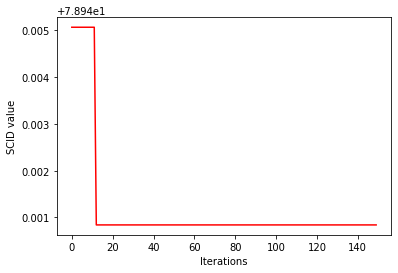

In [12]:
plt.xlabel("Iterations")
plt.ylabel("SCID value")
plt.plot(np.arange(150), scid, color = "red")
plt.show()